
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>º

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/datasets/Churn.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


La columna "Tenure" es la unica que tiene valores nulos

In [4]:
mean = df['Tenure'].mean()

In [5]:
#Para la columna de 'Tenure', llenamos los valores ausentes con la mediana


df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo eliminando los datos faltantes en la columna Tenure! El manejo adecuado de los valores ausentes es crucial para evitar problemas en el entrenamiento del modelo.

</div>

Los valores nulos de la columna "Tenure" se reemplazaron con la mediana

In [6]:
#corroboramos si hay valores nulos 
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
(10000, 14)


In [8]:
columns_= pd.DataFrame(df.dtypes)
columns_ 

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,float64
Balance,float64
NumOfProducts,int64


In [9]:
categories= list(columns_[columns_[0] == 'object'].index[1:])
categories

['Geography', 'Gender']

In [10]:
numerics=list(columns_[columns_[0] != 'object'].index[2:-1])
numerics

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [11]:
no_information= ['RowNumber', 'CustomerId', 'Surname']
no_information

['RowNumber', 'CustomerId', 'Surname']

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen ojo! Eliminaste las columnas innecesarias, lo que ayuda a reducir el ruido en los datos. Estas columnas, como RowNumber, CustomerId y Surname, no aportan información útil para el modelo, por lo que eliminarlas es una excelente decisión.

</div>

In [12]:
data = df.drop(no_information, axis=1)
data
#features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [13]:
clear_data=pd.get_dummies(data, drop_first=True, columns=categories)
clear_data #datos limpios y organizados para ser usados

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo utilizando One-Hot Encoding (OHE)! Esta técnica es ideal para convertir variables categóricas en un formato numérico, permitiendo que los modelos de aprendizaje automático puedan procesarlas. OHE asegura que los datos categóricos no introduzcan relaciones ficticias entre variables.

Además, usaste correctamente `drop_first=True`, lo que evita la multicolinealidad al eliminar una categoría redundante. Esto ayuda a reducir la dimensionalidad de los datos sin perder información.
    
</div>

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Parece que no has dejado comentarios claros sobre las decisiones tomadas. Es importante explicar cada transformación o limpieza que hagas en los datos para que quede claro por qué se tomaron ciertas decisiones.

También recuerda utilizar títulos para separar secciones.
    
</div>

In [14]:
#division de datos para el entrenamiento de los modelos
training_validation, test = train_test_split(clear_data, test_size=0.2, random_state=12345)

In [15]:
training, validation = train_test_split(training_validation, test_size=0.25, random_state=12345)


In [16]:
scaler = StandardScaler()

In [17]:
training_target = training['Exited']
training_features = training.drop(['Exited'], axis=1)
training_features[numerics] = scaler.fit_transform(training_features[numerics])

In [18]:
test_target = test['Exited']
test_features = test.drop(['Exited'], axis=1)
test_features[numerics] = scaler.transform(test_features[numerics])
#test_features

In [19]:
validation_target = validation['Exited']
validation_features = validation.drop(['Exited'], axis=1)
validation_features[numerics] = scaler.transform(validation_features[numerics])
#validation_features

# Análisis del balance de clases


0    4781
1    1219
Name: Exited, dtype: int64


<AxesSubplot:>

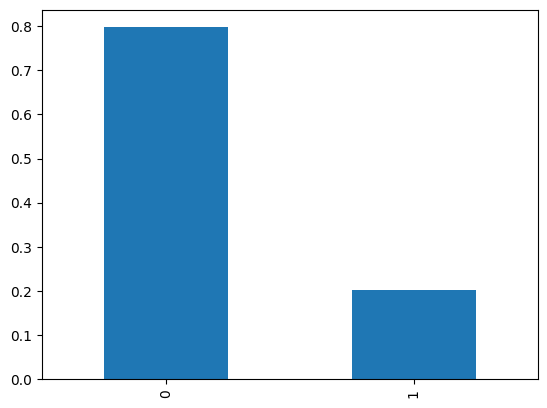

In [20]:
print(training_target.value_counts())

# Porcentaje de clases
training_target.value_counts(normalize=True).plot(kind='bar')


Dada la relacion de valores 0 y 1, se tiene un desbalance de clases, por lo que es conveniente usar F1: util para conjuntos de datos desbalanceados.

<div class="alert alert-block alert-danger"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Parece que no consideraste el análisis del balance de clases, un aspecto crucial para evaluar si alguna clase está sobrerrepresentada o subrepresentada. Este desequilibrio puede impactar negativamente las predicciones del modelo, por lo que es fundamental revisar cuidadosamente la distribución de las clases.

Además, es importante determinar la magnitud de este desbalance para decidir con precisión qué técnicas aplicar, como _oversampling_ o _downsampling_, y con qué peso emplearlas.
</div>


<div class="alert alert-block alert-info"> <b>Corregido.</b> <a class="tocSkip"></a> </div>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Excelente! Has estudiado el balance de clases. Este es un paso crucial cuando las clases están desbalanceadas, ya que puede afectar el rendimiento del modelo. Al comprender la distribución de las clases, puedes aplicar técnicas para corregir el desequilibrio.

</div>

# Equilibrio de clases


# upsample

In [21]:
from sklearn.utils import shuffle
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=54321)

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(training_features, training_target, 2)


# LogisticRegression

In [22]:
model = LogisticRegression(random_state=54321)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(validation_features)
probabilities= model.predict_proba(validation_features)[:,1]
print('F1:', f1_score(validation_target, predicted_valid))

F1: 0.4839572192513369


# downsample

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Muy bien! Usaste al menos dos técnicas para tratar el desbalanceo de clases, como el ajuste de pesos, upsampling o downsampling. Estas técnicas son fundamentales para que el modelo no favorezca la clase mayoritaria y tenga un mejor rendimiento en la clase minoritaria.

</div>

In [23]:
from sklearn.utils import shuffle
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(training_features, training_target, 0.29)

In [24]:
model = LogisticRegression(random_state=463523)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(validation_features)
probabilities= model.predict_proba(validation_features)[:,1]
print('F1:', f1_score(validation_target, predicted_valid))

F1: 0.48664122137404586


# Modelo LogisticRegression()

In [25]:
model = LogisticRegression(random_state=54321)
model.fit(training_features, training_target)
predicted_valid = model.predict(validation_features)
probabilities= model.predict_proba(validation_features)[:,1]
print('F1:', f1_score(validation_target, predicted_valid))

F1: 0.30131826741996237


<div class="alert alert-block alert-danger"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

La métrica F1 no ha alcanzado el 0.59. Esto puede deberse a un desequilibrio en las clases o a un ajuste inadecuado del modelo. Intenta ajustar los hiperparámetros o balancear mejor los datos para mejorar esta métrica clave.

1. **Explora modelos más robustos:** Dedica tiempo a probar diferentes modelos además de la regresión logística que ya utilizaste. Por ejemplo, considera un modelo de Random Forest, que suele ser más robusto para este tipo de problemas. Asegúrate de realizar un ajuste de hiperparámetros (tuning) para optimizar su desempeño.

2. **Preba/mejora las técnicas de muestreo:** Es fundamental aplicar buenas técnicas de muestreo (Por ejemplo, Sobremuestreo, Submuestreo o Métodos de balanceo integrados en el modelo). Esto no solo te permitirá comparar los resultados, sino que también es posible que una técnica sea más adecuada que otra para tu conjunto de datos.

3. **Analiza el desbalanceo de los datos antes de muestrear:** Antes de aplicar las técnicas de muestreo, realiza un análisis del desbalanceo en las clases. Un buen enfoque es crear un gráfico, como un gráfico de barras, que muestre las proporciones de cada clase. Esto te permitirá identificar el grado de desbalanceo y decidir un ratio adecuado para el re-muestreo (por ejemplo, equilibrar las clases al 50%-50% o mantener cierta proporción original).

4. **Valida el efecto del muestreo:** Una vez que apliques el muestreo, verifica si el problema de desbalanceo se ha resuelto. Esto puedes hacerlo imprimiendo las dimensiones del dataset resultante (con .shape) y revisando nuevamente las proporciones de las clases. Es crucial asegurarte de que el muestreo efectivamente haya corregido el desbalanceo y no haya generado un problema adicional, como un desbalanceo inverso.

</div>

# Modelo RandomForestClassifier

In [26]:
##---------------Usando upsampled
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
best_score = 0
best_est = 0
best_auc_roc = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=463523)# inicializa el constructor de modelos con los parámetros random_state=54321, n_estimators=est y max_depth=depth
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(validation_features)
        score=f1_score(validation_target, predicted_valid)
        probabilities_valid = model.predict_proba(validation_features)
        probabilities_one_valid = probabilities_valid[:, 1]
        if score > best_score:
            best_score = score
            best_est = est
        auc_roc=roc_auc_score(validation_target, probabilities_one_valid)
        if auc_roc > best_auc_roc:
            best_auc_roc = auc_roc
        
          
print("El valor F1 mas grande en el conjunto de validación (n_estimators = {}): {}".format(best_est, best_score))
print("auc_roc:", best_auc_roc)

El valor F1 mas grande en el conjunto de validación (n_estimators = 50): 0.6080691642651297
auc_roc: 0.8545362642043874


In [29]:
#El modelo RandomForestClassifier en conjunto con la tecnica de muestreo  upsampled permiten un valor F1 =0.6 con auc_roc: 0.85

In [28]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
best_score = 0
best_est = 0
best_auc_roc = 0
for est in range(10, 51, 5):
    for depth in range (1, 31):
        model = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=463523)# inicializa el constructor de modelos con los parámetros random_state=54321, n_estimators=est y max_depth=depth
        model.fit(features_downsampled, target_downsampled)
        predicted_valid = model.predict(validation_features)
        score=f1_score(validation_target, predicted_valid)
        probabilities_valid = model.predict_proba(validation_features)
        probabilities_one_valid = probabilities_valid[:, 1]
        if score > best_score:
            best_score = score
            best_est = est
        auc_roc=roc_auc_score(validation_target, probabilities_one_valid)
        if auc_roc > best_auc_roc:
            best_auc_roc = auc_roc
        
          
print("El valor F1 mas grande en el conjunto de validación (n_estimators = {}): {}".format(best_est, best_score))
print("auc_roc:", best_auc_roc)

El valor F1 mas grande en el conjunto de validación (n_estimators = 30): 0.5802997858672377
auc_roc: 0.8489967716759468


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Excelente! Estudiaste la métrica AUC-ROC, que es una de las mejores métricas para evaluar modelos de clasificación binaria. Un buen AUC-ROC indica que el modelo es capaz de distinguir correctamente entre las clases.
    
Además, parece ser que el modelo RandomForestClassifier tiene buenos resultados con ciertos valores de hiperparámetros al validarlo con el conjunto de validación. 
   
<div class="alert alert-block alert-danger"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Solo falta seleccionar los mejores hiperparámetros y testear el modelo final con el conjunto de test previamente separado para esto. De llegar al 0.59 solicitado, el trabajo estaría finalizado.

</div>

</div>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy buen trabajo Ann! 

<div class="alert alert-block alert-danger">
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Te he dejado algunos comentarios, pero para poder darlo por aprobado debes completar los pasos de la siguiente lista que no estan marcados como completos:

</div>

- [ ]  Análisis de las clases.
    - [ ]  Se ha estudiado el balance de clases.
    - [ ]  Se han utilizado al menos 2 técnicas para combatir el desequilibrio de las clases (por ejemplo: weight adjustment, upsampling, downsampling).
    - [ ]  Los resultados del estudio han sido documentados.
- [ ]  Se ha estudiado la métrica *F1* con **al menos 0.59**.
- [ ]  Se ha estudiado la métrica *AUC-ROC*.

</div>


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Muy buen trabajo Ann! 

<div class="alert alert-block alert-danger">
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Solo quedaría testear el modelo con los mejores hiperparámetros y controlar que se alcanza un valor de 0.59 o más para la métrica F1. 
    
También, no olvides dejar claramente tus conclusiones sobre los resultados.

</div>
    
Sin duda, aplicando upsample y utilizando el modelo RandomForestClassifier pareces estar teniendo buenos resultados. 

</div>

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #3</b> <a class="tocSkip"></a>

Muy buen trabajo. Sin embargo, aún no veo la validación final con el conjunto TEST. Sin embargo, tu entrega está muy bien. 
    
Recuerda siempre utilizar al final el conjunto test separado al comienzo para evaluar el modelo final.

</div>